Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [20]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/02_Regression'
except ImportError as e:
    pass

## Exercise 6: Regression

### 6.1. Modeling characteristics of fish
The Fish dataset is a simple dataset which helps to illustrate the linear and non-linear dependencies which may exist between different attributes of the data. The dataset is provided in the fish.csv file. It contains 44 examples, each with four attributes: age, water temperature, weight and length.
#### 6.1.1 Load the Fish dataset and visualize it by combining different attributes. Can you make an assumption about the function to predict the weight and length based on one of the variables?

In [21]:
# Load fish data
import pandas as pd
fish = pd.read_csv('fish.csv')
fish.head()

,age,temp,weight,length
0,14,25,100,620
1,28,25,40,1315
2,41,25,78,2120
3,55,25,99,2600
4,69,25,163,3110


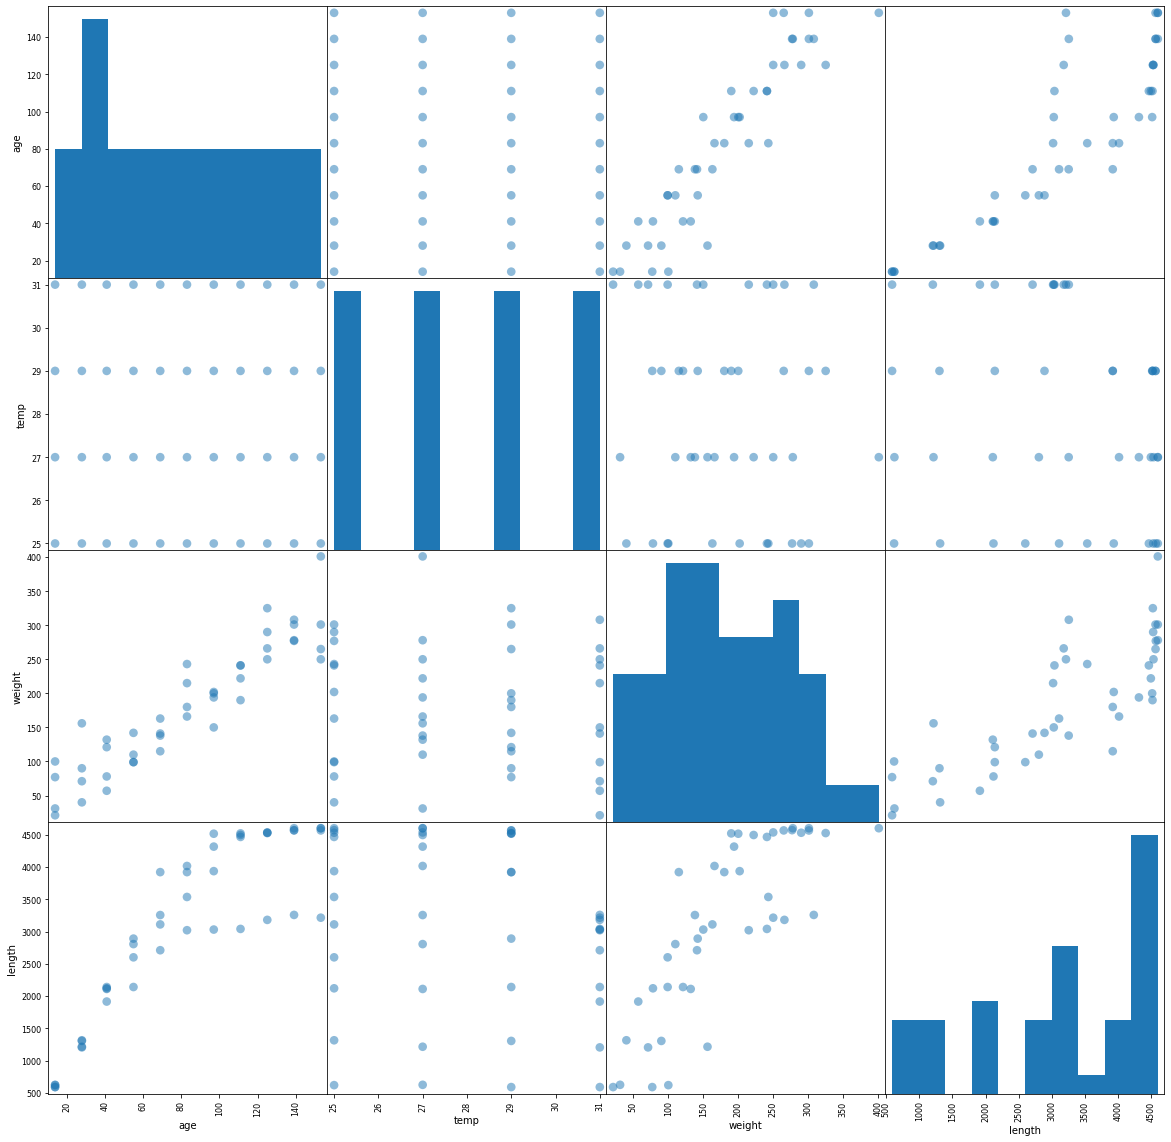

In [22]:
# TODO: plot scatterplots of all feature combinations using either the pd.plotting.scatter_matrix function or matplotlib
pd.plotting.scatter_matrix(fish, figsize=(20, 20), s=300); #s makes 

#### 6.1.2 Learn a linear regression model based on the combination of attributes you find most convenient for length and for weight (one regression using length as label, and one regression using weight as label). Now try a polynomial regression for attribute length. Which types of regression work best? Do they apply equally to all combinations of attributes? Use a train/test split with 40% test samples.

In [23]:
from sklearn.model_selection import train_test_split

# separate features and target variable
length = fish['length']
weight = fish['weight']

# special case: we only have one feature, so we must reshape the data here
features = fish['age'].values.reshape(-1, 1)

# create a train/test split
length_train, length_test, length_target_train, length_target_test = train_test_split(
    features, length, test_size=0.4, random_state=42)

weight_train, weight_test, weight_target_train, weight_target_test = train_test_split(
    features, weight, test_size=0.4, random_state=42)

Learn a linear regression model for the weight:

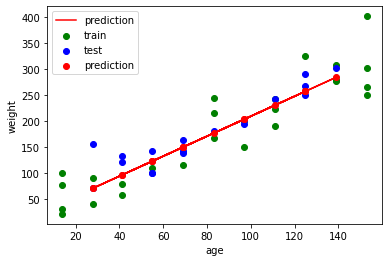

weight = 1.9201086610392861*age + 16.715220383987855


In [24]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#weight_train, weight_test, weight_target_train, weight_target_test

# create and fit a linear regression
model_LR_Weight = LinearRegression()
model_LR_Weight.fit(weight_train,weight_target_train)

# plot the original values
plt.scatter(weight_train, weight_target_train, c='green', label='train')
plt.scatter(weight_test, weight_target_test, c='blue', label='test')

# plot the predicted values
plt.scatter(weight_test,model_LR_Weight.predict(weight_test),c='red', label='prediction')
plt.plot(weight_test,model_LR_Weight.predict(weight_test),c='red', label='prediction')

# format and show the plot
plt.xlabel('age')
plt.ylabel('weight')
plt.legend()
plt.show()

# print the model that was fitted (the regression formula)
print("weight = {}*age + {}".format(model_LR_Weight.coef_[0], model_LR_Weight.intercept_))

Learn a linear regression model for the length:

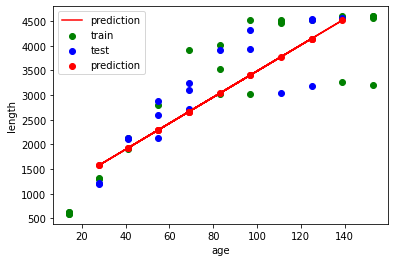

weight = 26.45879282386429*age + 840.4859127674258


In [25]:
# create and fit a linear regression
model_LR_Length = LinearRegression()
model_LR_Length.fit(length_train,length_target_train)

# plot the original values
plt.scatter(length_train, length_target_train, c='green', label='train')
plt.scatter(length_test, length_target_test, c='blue', label='test')

# plot the predicted values
plt.scatter(length_test,model_LR_Length.predict(length_test),c='red', label='prediction')
plt.plot(length_test,model_LR_Length.predict(length_test),c='red', label='prediction')


# format and show the plot
plt.xlabel('age')
plt.ylabel('length')
plt.legend()
plt.show()

# print the model that was fitted (the regression formula)
print("weight = {}*age + {}".format(model_LR_Length.coef_[0], model_LR_Length.intercept_))

Learn a polynomial regression model for the length:

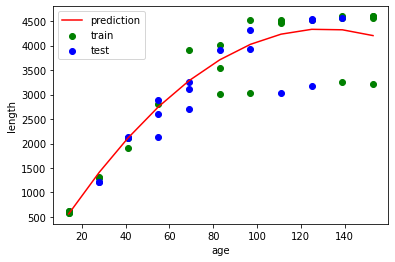

length = 72.52426890187219*age + -0.2773396272513636*age^2 + -399.1757643046544


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# create a transformer that generates polynomial features
transformer = PolynomialFeatures(degree=2, include_bias=False)
estimator = LinearRegression()

# setup and fit a pipeline
pipeline = Pipeline([ ('transformer', transformer), ('estimator', estimator)])
pipeline.fit(length_train, length_target_train)

prediction = pipeline.predict(features)

# plot the original values
plt.scatter(length_train, length_target_train, c='green', label='train')
plt.scatter(length_test, length_target_test, c='blue', label='test')

# create a new dataframe that contains the age and the predictions
d = fish[['age']]
d = d.assign(prediction=prediction)

# sort the data before plotting it (only for sorting)
d = d.sort_values(by='age')

# plot the predicted values
plt.plot(d['age'], d['prediction'], c='red', label='prediction')

plt.xlabel('age')
plt.ylabel('length')
plt.legend()
plt.show()

# print the model that was fitted (the regression formula)
print("length = ", end='')
for i, f in enumerate(pipeline.named_steps['transformer'].get_feature_names(['age'])):
    if i > 0:
        print(" + ", end='')
    print("{}*{}".format(pipeline.named_steps['estimator'].coef_[i], f), end='')
print(" + {}".format(pipeline.named_steps['estimator'].intercept_))


#### 6.1.3 Measure the performance of the different regression models you learned before. Use  RMSE as well as R2 for evaluation.

In [27]:
#for i,k in zip(weight_target_test, pred_1):
#    print(i," ",k)


In [28]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

for i in [model_LR_Weight, model_LR_Length ,pipeline]:
    print(i)

print("\n Weight as a function of age")
pred_1 = model_LR_Weight.predict(weight_test)
mse_1 = mean_squared_error(weight_target_test, pred_1)
r2_1 = r2_score(weight_target_test, pred_1)
print("MSE:", mse_1)
print("RMSE:", sqrt(mse_1))
print("R^2:", r2_1)
print()

print("Length as a function of age (linear)")

pred_2 = model_LR_Length.predict(length_test)
mse_2 = mean_squared_error(length_target_test, pred_2)
r2_2 = r2_score(length_target_test, pred_2)
print("MSE:", mse_2)
print("RMSE:", sqrt(mse_2))
print("R^2:", r2_2)
print()

print("Length as a function of age (polynomial)")
pred_3 = pipeline.predict(length_test)
mse_3 = mean_squared_error(length_target_test, pred_3)
r2_3 = r2_score(length_target_test, pred_3)
print("MSE:", mse_3)
print("RMSE:", sqrt(mse_3))
print("R^2:", r2_3)
print() 

LinearRegression()
LinearRegression()
Pipeline(steps=[('transformer', PolynomialFeatures(include_bias=False)),
                ('estimator', LinearRegression())])

 Weight as a function of age
MSE: 718.0015865066587
RMSE: 26.795551617883493
R^2: 0.8377560501503947

Length as a function of age (linear)
MSE: 279670.9586699723
RMSE: 528.8392559842474
R^2: 0.742304227302228

Length as a function of age (polynomial)
MSE: 216093.2822413802
RMSE: 464.8583464254247
R^2: 0.8008862786225035



### 6.2. Feature Selection
In this exercise you will explore different feature selection methods for linear regression.

#### 1. First, fit a linear regression model to the “birthweight_train” dataset without any feature selection and evaluate the model on the “birthweight_test” dataset.

In [29]:
# Load train and test data
b_train = pd.read_csv('birthweight_train.csv', sep=';')
b_test = pd.read_csv('birthweight_test.csv', sep=';')

b_train.head()

,LowBirthWeight = Low,LowBirthWeight = Normal,headcirumference,length,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,id,Birthweight
0,0.0,1.0,13.0,19.0,34.0,0.0,26.0,0.0,65.0,140.0,25.0,12.0,25.0,69.0,0.0,0.0,808.0,6.4
1,1.0,0.0,13.0,18.0,35.0,1.0,20.0,35.0,67.0,125.0,23.0,12.0,50.0,73.0,1.0,0.0,516.0,5.8
2,0.0,1.0,13.0,19.0,37.0,0.0,28.0,0.0,62.0,118.0,39.0,10.0,0.0,67.0,0.0,0.0,321.0,6.8
3,0.0,1.0,12.0,19.0,37.0,1.0,19.0,7.0,65.0,132.0,20.0,14.0,0.0,72.0,0.0,0.0,575.0,6.1
4,0.0,1.0,14.0,21.0,38.0,0.0,18.0,0.0,67.0,109.0,20.0,12.0,7.0,67.0,0.0,0.0,1081.0,8.0


In [30]:
# Split features and target

# drop the 'id' and 'Birthweigth' columns from the feature set
# using .iloc[,] you can access parts of the dataframe using numeric indices
# the first argument specifies which records to keep (here : means all)
# the second argument specifies which columns to keep (here 0:-2 means start from the first and end before the second last)
features_train = b_train.iloc[:,0:-2] #keep 0 to -2
target_train = b_train['Birthweight']

features_test = b_test.iloc[:,0:-2]
target_test = b_test['Birthweight']

features_train.head()

,LowBirthWeight = Low,LowBirthWeight = Normal,headcirumference,length,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,0.0,1.0,13.0,19.0,34.0,0.0,26.0,0.0,65.0,140.0,25.0,12.0,25.0,69.0,0.0,0.0
1,1.0,0.0,13.0,18.0,35.0,1.0,20.0,35.0,67.0,125.0,23.0,12.0,50.0,73.0,1.0,0.0
2,0.0,1.0,13.0,19.0,37.0,0.0,28.0,0.0,62.0,118.0,39.0,10.0,0.0,67.0,0.0,0.0
3,0.0,1.0,12.0,19.0,37.0,1.0,19.0,7.0,65.0,132.0,20.0,14.0,0.0,72.0,0.0,0.0
4,0.0,1.0,14.0,21.0,38.0,0.0,18.0,0.0,67.0,109.0,20.0,12.0,7.0,67.0,0.0,0.0


We start with a standard linear regression model using all the features.

In [31]:
#TODO: INSERT YOUR CODE HERE

model_Birthweigth = LinearRegression()
model_Birthweigth.fit(features_train,target_train)

pred = model_Birthweigth.predict(features_test)
mse = mean_squared_error(target_test,pred)

print("RMSE:", sqrt(mse))

RMSE: 1.0599390206226786


#### 2. Look at the results of an F-Regression and inspect the p-values for each feature. Fit a second regression model using only the significant features (p<=0.05). How does the performance of your model change?

In [32]:
from sklearn.feature_selection import f_regression

# create a transformer
# play with degree
# higer F = better
transformer = PolynomialFeatures(degree=1, include_bias=False)

#display(dat_set)

# run the F-Test
#transformer_fit = transformer.fit_transform(features_train)
f, pval = f_regression(transformer.fit_transform(features_train), target_train)

# prepare a dataframe to inspect the results
stat = pd.DataFrame({ 'feature': transformer.get_feature_names(features_train.columns), 'F value': f, 'p value': pval })
stat['p value'] = round(stat['p value'], 2)

# # show the results
display(stat)

,feature,F value,p value
0,LowBirthWeight = Low,2.476791,0.13
1,LowBirthWeight = Normal,2.476791,0.13
2,headcirumference,19.444167,0.00
3,length,22.885328,0.00
4,Gestation,13.989168,0.00
5,smoker,1.574123,0.22
6,motherage,0.195507,0.66
7,mnocig,2.556162,0.12
8,mheight,2.087771,0.16
9,mppwt,1.818643,0.19


In [33]:
from sklearn.feature_selection import f_regression

# create a transformer
# play with degree
# higer F = better
transformer = PolynomialFeatures(degree=6, include_bias=False)

#display(dat_set)

# run the F-Test
#transformer_fit = transformer.fit_transform(features_train)
f, pval = f_regression(transformer.fit_transform(features_train), target_train)

# prepare a dataframe to inspect the results
stat = pd.DataFrame({ 'feature': transformer.get_feature_names(features_train.columns), 'F value': f, 'p value': pval })
stat['p value'] = round(stat['p value'], 2)

# # show the results
display(stat.sort_values("F value",ascending=False))

c:\users\tobi1\anaconda3\envs\dm1\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


,feature,F value,p value
11898,headcirumference^2 length Gestation^2,60.062254,0.0
48135,headcirumference^2 length Gestation^2 mheight,59.269447,0.0
48053,headcirumference^2 length^2 Gestation^2,59.149742,0.0
423,headcirumference length Gestation,57.212582,0.0
48131,headcirumference^2 length Gestation^3,56.304846,0.0
...,...,...,...
74606,lowbwt^5 mage35,NaN,NaN
74607,lowbwt^4 mage35^2,NaN,NaN
74608,lowbwt^3 mage35^3,NaN,NaN
74609,lowbwt^2 mage35^4,NaN,NaN


### Use F Test

In [35]:
from sklearn.feature_selection import SelectKBest, SelectFwe

# create a pipeline with feature selection based on the F Test
# select best features automatically
best = SelectFwe(f_regression, alpha=0.05)
transformer = PolynomialFeatures(degree=3, include_bias=False)

In [36]:
# fit the regression on the training data
pipeline = Pipeline([ ('transformer', transformer), ('feature_selection', best), ('estimator', estimator)])

# fit the regression on the training data
pipeline.fit(features_train, target_train)

# predict the values for the test data
predictions = pipeline.predict(features_test) 

c:\users\tobi1\anaconda3\envs\dm1\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [ ]:
# evaluate on the test set
mse = mean_squared_error(target_test, predictions)

print("MSE:", mse)
print("RMSE:", sqrt(mse))

#### 3. Look at the new model and inspect the p-values again. Are there any features for which the p-value has changed?

In [ ]:
from sklearn.feature_selection import f_regression


f, pval = f_regression(transformer.transform(features_train), target_train)

# prepare a dataframe to inspect the results
stat = pd.DataFrame({ 'feature': transformer.get_feature_names(features_train.columns), 'F value': f, 'p value': pval })
stat['p value'] = round(stat['p value'], 2)

# # show the results
display(stat.sort_values("F value",ascending=False))

### 6.3. Predicting housing prices in Boston

The Housing dataset describes 506 houses in the suburbs of Boston in 1993. The data set is provided in the housing.csv file. The houses are described by the following 12 continuous attributes and 1 binary attribute.

#### 1. Your task is to find a good regression model for determining the median value (column MEDV) of a house.
You may experiment with linear and polynominal regression and different parameters. As always, it may help to first visualize different attribute combinations of the data. What are the best RMSE and R2 that you can achieve using the different methods?

In [ ]:
# Load the training and test data
h_train = pd.read_csv('housing_train.csv', sep=';')
h_test = pd.read_csv('housing_test.csv', sep=';')
h_train.head()

In [ ]:
# Split features and target
train_data = h_train.iloc[:,0:-1]
train_target = h_train['MEDV']

test_data = h_test.iloc[:,0:-1]
test_target = h_test['MEDV']

Run all regression approaches that you learned about:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

polynomial_regression = Pipeline([ 
    ('transformer', PolynomialFeatures(degree=2, include_bias=False)), 
    ('estimator', LinearRegression())
])

# VU: p value must be higher than defined alpha value (otherwise null pypothesis will be removed)
best = SelectFwe(f_regression, alpha=0.05)
transformer = PolynomialFeatures(degree=1, include_bias=False)
polynomial_regression_transformer_1 = Pipeline([ ('transformer', transformer), ('feature_selection', best), ('estimator', estimator)])

best = SelectFwe(f_regression, alpha=0.05)
transformer2 = PolynomialFeatures(degree=2, include_bias=False)
polynomial_regression_transformer_2 = Pipeline([ ('transformer', transformer2), ('feature_selection', best), ('estimator', estimator)])

best = SelectFwe(f_regression, alpha=0.05)
transformer3 = PolynomialFeatures(degree=3, include_bias=False)
polynomial_regression_transformer_3 = Pipeline([ ('transformer', transformer3), ('feature_selection', best), ('estimator', estimator)])

# best = SelectFwe(f_regression, alpha=0.05)
# transformer5 = PolynomialFeatures(degree=5, include_bias=False)
# polynomial_regression_transformer_5 = Pipeline([ ('transformer', transformer5), ('feature_selection', best), ('estimator', estimator)])

# best = SelectFwe(f_regression, alpha=0.05)
# transformer10 = PolynomialFeatures(degree=10, include_bias=False)
# polynomial_regression_transformer_10 = Pipeline([ ('transformer', transformer10), ('feature_selection', best), ('estimator', estimator)])


# test different regression approaches
estimators = [LinearRegression(), polynomial_regression, Ridge(), polynomial_regression_transformer_1, polynomial_regression_transformer_2, polynomial_regression_transformer_3, polynomial_regression_transformer_5, polynomial_regression_transformer_10]

for estimator in estimators:
    # fit the estimator to training data
    estimator.fit(train_data,train_target)
    # predict the values for the test data
    pred = estimator.predict(test_data)
    # evaluate on the test set
    mse = mean_squared_error(test_target, pred)
    r2 = r2_score(test_target, pred)
    # print rmse and r^2
    print("\n Estimator:{}".format(estimator))
    print("MSE:", mse)
    print("RMSE:", sqrt(mse))
    print("R^2:", r2)
    

# Understand SelectFwe

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectFwe, chi2

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X.shape

In [ ]:
chi2

In [ ]:
X_new = SelectFwe(chi2, alpha=0.01).fit_transform(X, y) #alpha changes amount of picked features

In [ ]:
X_new.shape

In [ ]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)